Avant toute analyse j'aimerais indiquer ici que les résultats qui vont suivre ne sont pertinents qu'au regard du fichier de données qui m'a été fourni. Autrement dit les valeurs de chiffre d'affaire par exemple sont à prendre avec un certain recul.

## Partie 1 - Inspection des données


Je commence par importer les librairies pandas, numpy, seaborn et matplotlib.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Lecture et analyse du premier fichier excel.

In [3]:
clients = pd.read_csv('customers.csv')
clients.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [5]:
clients_duplicate = clients[clients.duplicated(['client_id'])]
print(clients_duplicate)

Empty DataFrame
Columns: [client_id, sex, birth]
Index: []


2. Lecture et analyse du deuxieme fichier excel.

In [6]:
produits = pd.read_csv('products.csv')
produits.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [7]:
produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [8]:
produits_duplicate = produits[produits.duplicated(['id_prod'])]
print(produits_duplicate)

Empty DataFrame
Columns: [id_prod, price, categ]
Index: []


3. Lecture et analyse du troisième fichier excel.

In [9]:
transactions = pd.read_csv('transactions.csv')
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [10]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


J'essaye de passer la colonne date au format date mais il y a plusieurs lignes de test que je vais devoir filtrer.

In [11]:
filtre = transactions['date'].str.contains('test', na= False)
transactions = transactions[~filtre]

In [12]:
transactions['date'] = pd.to_datetime(transactions['date'])

In [13]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


In [14]:
transactions.duplicated().sum()

0

Je vais maintenant fusionner mes trois fichiers.

In [15]:
premiere_liaison = pd.merge (transactions, clients, how='outer', on=['client_id'], indicator=True)
premiere_liaison.head()

,id_prod,date,session_id,client_id,sex,birth,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,both
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,f,1986,both
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,f,1986,both
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,f,1986,both
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,f,1986,both


In [16]:
premiere_liaison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679355 entries, 0 to 679354
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679355 non-null  object        
 4   sex         679355 non-null  object        
 5   birth       679355 non-null  int64         
 6   _merge      679355 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(1), object(4)
memory usage: 36.9+ MB


In [17]:
premiere_liaison['_merge'].unique()

['both', 'right_only']
Categories (3, object): ['left_only', 'right_only', 'both']

In [18]:
premiere_liaison.loc[premiere_liaison['_merge'] == 'right_only']

,id_prod,date,session_id,client_id,sex,birth,_merge
679332,NaN,NaT,NaN,c_8253,f,2001,right_only
679333,NaN,NaT,NaN,c_3789,f,1997,right_only
679334,NaN,NaT,NaN,c_4406,f,1998,right_only
679335,NaN,NaT,NaN,ct_0,f,2001,right_only
679336,NaN,NaT,NaN,c_2706,f,1967,right_only
679337,NaN,NaT,NaN,c_3443,m,1959,right_only
679338,NaN,NaT,NaN,c_4447,m,1956,right_only
679339,NaN,NaT,NaN,c_3017,f,1992,right_only
679340,NaN,NaT,NaN,c_4086,f,1992,right_only
679341,NaN,NaT,NaN,c_6930,m,2004,right_only


Ces 23 lignes ne sont présentes que dans la table de droite (clients), cela signifie que ces clients n'ont jamais commandés sur le site. Je vais donc les enlever pour analyses futures.

In [19]:
premiere_liaison.loc[premiere_liaison['_merge'] == 'left_only']

,id_prod,date,session_id,client_id,sex,birth,_merge


Toutes les lignes de la table des transactions (à gauche) ont été associées à un client. Par la suite je ne garde que les correspondances exactes entre ces deux fichiers. Ce qui correspond à une liaison interne.

In [20]:
premiere_liaison = premiere_liaison.loc[premiere_liaison['_merge'] == 'both']

In [21]:
premiere_liaison = premiere_liaison.drop(columns='_merge')

In [22]:
premiere_liaison.head()

,id_prod,date,session_id,client_id,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,f,1986
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,f,1986
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,f,1986
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,f,1986


J'ajoute le dernier fichier produits.

In [23]:
fichier_final = pd.merge (premiere_liaison, produits, how='outer', on=['id_prod'], indicator=True)
fichier_final.head()

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0,both
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0,both
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0,both


In [24]:
fichier_final.loc[fichier_final['_merge'] == 'both']

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0,both
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0,both
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0,both
...,...,...,...,...,...,...,...,...,...
679327,1_408,2023-01-26 06:52:02.225335,s_332548,c_7402,m,1945.0,35.24,1.0,both
679328,1_408,2022-11-26 06:52:02.225335,s_302962,c_7402,m,1945.0,35.24,1.0,both
679329,1_408,2021-09-26 06:52:02.225335,s_95708,c_7402,m,1945.0,35.24,1.0,both
679330,2_81,2022-02-19 14:51:58.078656,s_167662,c_7616,m,1993.0,86.99,2.0,both


In [25]:
fichier_final.loc[fichier_final['_merge'] == 'right_only']

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
679332,0_1016,NaT,NaN,NaN,NaN,NaN,35.06,0.0,right_only
679333,0_1780,NaT,NaN,NaN,NaN,NaN,1.67,0.0,right_only
679334,T_0,NaT,NaN,NaN,NaN,NaN,-1.00,0.0,right_only
679335,0_1062,NaT,NaN,NaN,NaN,NaN,20.08,0.0,right_only
679336,0_1119,NaT,NaN,NaN,NaN,NaN,2.99,0.0,right_only
679337,0_1014,NaT,NaN,NaN,NaN,NaN,1.15,0.0,right_only
679338,1_0,NaT,NaN,NaN,NaN,NaN,31.82,1.0,right_only
679339,0_1318,NaT,NaN,NaN,NaN,NaN,20.92,0.0,right_only
679340,0_1800,NaT,NaN,NaN,NaN,NaN,22.05,0.0,right_only
679341,0_1645,NaT,NaN,NaN,NaN,NaN,2.99,0.0,right_only


Ces 22 lignes du fichier produits n'ont pas de correspondances dans la table des transactions. Ce qui veut dire que ces produits ne sont pas en vente sur le site probablement ou n'ont jamais trouvé d'acheteurs. Je vais donc les enlever pour analyses futures.

In [26]:
fichier_final.loc[fichier_final['_merge'] == 'left_only']

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
311747,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,f,1968.0,NaN,NaN,left_only
311748,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,f,1968.0,NaN,NaN,left_only
311749,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,f,1968.0,NaN,NaN,left_only
311750,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,f,1968.0,NaN,NaN,left_only
311751,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,f,1968.0,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
311963,0_2245,2021-10-19 09:32:03.667461,s_107022,c_6128,m,1986.0,NaN,NaN,left_only
311964,0_2245,2021-11-12 09:25:22.905886,s_118458,c_7416,m,1933.0,NaN,NaN,left_only
311965,0_2245,2021-08-22 08:51:27.564509,s_79102,c_6752,m,1987.0,NaN,NaN,left_only
311966,0_2245,2022-04-22 08:51:27.564509,s_197669,c_6752,m,1987.0,NaN,NaN,left_only


Ces 221 lignes de la table transactions n'ont pas de correspondance dans la table des produits. Cela signifie que la référence produit 0_2245 n'existe pas ou est absente de la table produits. Comme il s'agit d'un grand nombre de données je vais compléter les valeurs absentes du prix par le prix moyen de la catégorie 0, car il s'agit d'un produit de cette catégorie.

In [27]:
fichier_final['categ'] = fichier_final['categ'].mask((fichier_final['id_prod'] == '0_2245') & fichier_final['categ'].isna(), 0)

In [28]:
moy_cat1 = produits.groupby('categ').mean()
moy_cat1

,price
categ,
0,11.727280
1,25.531421
2,108.354686


In [29]:
fichier_final['price'] = fichier_final['price'].mask((fichier_final['id_prod'] == '0_2245') & fichier_final['price'].isna(), 11.73)

In [30]:
fichier_final.loc[fichier_final['_merge'] == 'left_only']

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
311747,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,f,1968.0,11.73,0.0,left_only
311748,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,f,1968.0,11.73,0.0,left_only
311749,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,f,1968.0,11.73,0.0,left_only
311750,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,f,1968.0,11.73,0.0,left_only
311751,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,f,1968.0,11.73,0.0,left_only
...,...,...,...,...,...,...,...,...,...
311963,0_2245,2021-10-19 09:32:03.667461,s_107022,c_6128,m,1986.0,11.73,0.0,left_only
311964,0_2245,2021-11-12 09:25:22.905886,s_118458,c_7416,m,1933.0,11.73,0.0,left_only
311965,0_2245,2021-08-22 08:51:27.564509,s_79102,c_6752,m,1987.0,11.73,0.0,left_only
311966,0_2245,2022-04-22 08:51:27.564509,s_197669,c_6752,m,1987.0,11.73,0.0,left_only


Maintenant je vais enlever uniquement les données de la liaison à droite et conserver le reste des données. 

In [31]:
fichier_final = fichier_final[~fichier_final['_merge'].str.contains('right_only')]

In [32]:
fichier_final = fichier_final.drop(columns='_merge')

In [33]:
fichier_final

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0
...,...,...,...,...,...,...,...,...
679327,1_408,2023-01-26 06:52:02.225335,s_332548,c_7402,m,1945.0,35.24,1.0
679328,1_408,2022-11-26 06:52:02.225335,s_302962,c_7402,m,1945.0,35.24,1.0
679329,1_408,2021-09-26 06:52:02.225335,s_95708,c_7402,m,1945.0,35.24,1.0
679330,2_81,2022-02-19 14:51:58.078656,s_167662,c_7616,m,1993.0,86.99,2.0


Une fois le traitement du fichier final terminé, nous voyons qu'il a un total de 679332 lignes ce qui correspond bien aux 679111 lignes pour la condition both additionné des 221 lignes pour la condition gauche seulement.

## Partie 2 - Analyse des différents indicateurs de vente

Voilà d'abord quelques informations générales sur la répartition du chiffre d'affaire.

In [34]:
fichier_final['price'].describe()

count    679332.000000
mean         17.452911
std          18.326307
min           0.620000
25%           8.870000
50%          13.990000
75%          18.990000
max         300.000000
Name: price, dtype: float64

In [35]:
ca_total = fichier_final['price'].sum()
print("Le chiffre d'affaire total pour la période considérée est de", ca_total, 'euros.')

Le chiffre d'affaire total pour la période considérée est de 11856321.01 euros.


Je présente ci dessous la distribution des prix des différents produits.

<AxesSubplot:xlabel='price', ylabel='Count'>

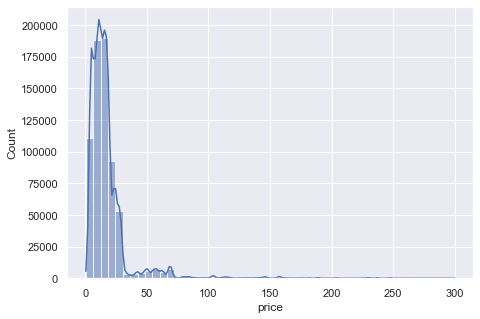

In [36]:
sns.set(style="darkgrid")
plt.figure(figsize=(16,5)) 
plt.subplot(1,2,1)
sns.histplot(fichier_final['price'], kde=True, bins=50)

Avec la boite à moustache, nous pouvons voir que la plupart des valeurs tournent autour des 15 €. Il y a beaucoup de valeurs extrêmes puisque dépassant la borne supérieure d'environ 30 €.

<AxesSubplot:xlabel='price'>

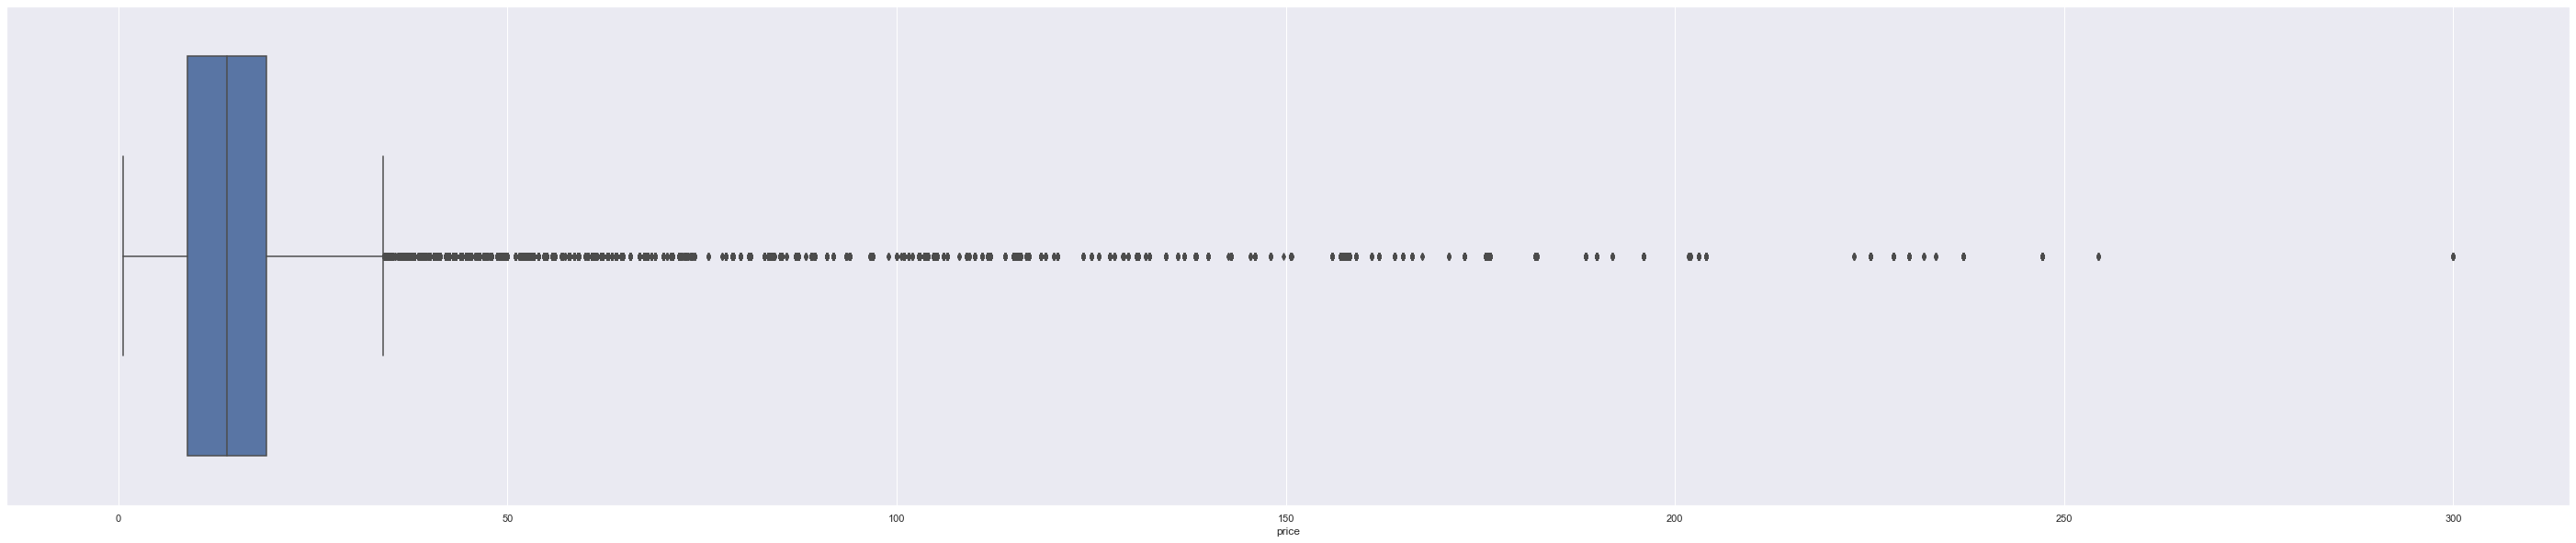

In [37]:
plt.figure(figsize=(50,10)) 
sns.boxplot( x=fichier_final["price"])

Je fais la somme des achats par jour. Pour afficher une distribution au cours du temps.

In [38]:
dfca_date = fichier_final.resample('D', on='date')['price'].sum().reset_index()
dfca_date

,date,price
0,2021-03-01,16576.95
1,2021-03-02,15498.18
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37
...,...,...
725,2023-02-24,15207.89
726,2023-02-25,15761.25
727,2023-02-26,16304.72
728,2023-02-27,19170.81


<AxesSubplot:xlabel='date', ylabel='price'>

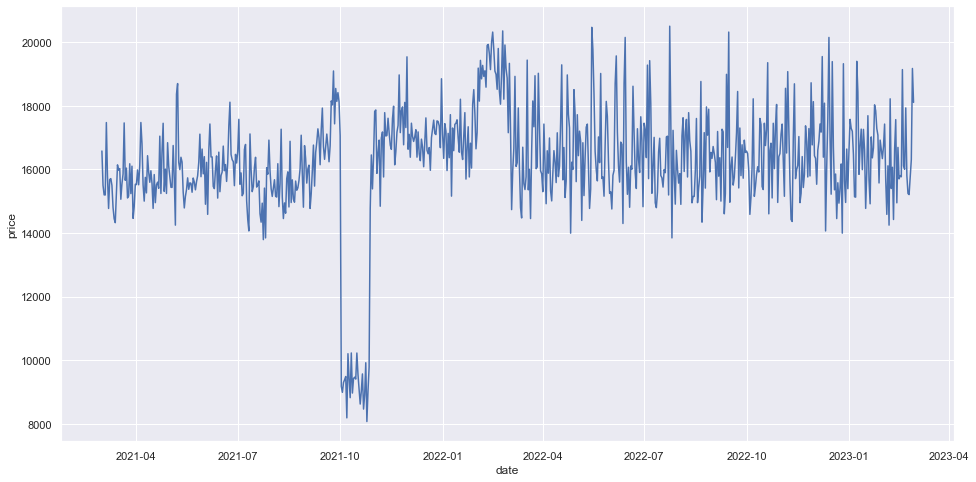

In [39]:
plt.figure(figsize=(16, 8))
sns.lineplot(x=dfca_date['date'], y=dfca_date['price'])

Le chiffre d'affaire semble suivre une évolution constante en légère augmentation autour de 16000 euros par jour. On peut remarquer une chute du chiffre d'affaire sur le mois d'octobre 2021. Je suppose que l'entreprise a rencontré un problème technique qui n'a pas permis d'enregistrer toutes les données conernant ce mois. Comme cela est resté limité dans le temps je n'en tiens pas compte.

Pour évaluer la tendance globale de manière graphique j'affiche les moyennes mobiles de 7 jours et de 30 jours que je superspose à l'évolution du CA.

In [40]:
dfca_date['moy_mobile7'] = dfca_date['price'].rolling(7).mean()
dfca_date['moy_mobile30'] = dfca_date['price'].rolling(30).mean()
dfca_date

,date,price,moy_mobile7,moy_mobile30
0,2021-03-01,16576.95,NaN,NaN
1,2021-03-02,15498.18,NaN,NaN
2,2021-03-03,15198.69,NaN,NaN
3,2021-03-04,15196.07,NaN,NaN
4,2021-03-05,17471.37,NaN,NaN
...,...,...,...,...
725,2023-02-24,15207.89,16490.454286,16241.498333
726,2023-02-25,15761.25,16008.422857,16190.805333
727,2023-02-26,16304.72,16036.697143,16165.181333
728,2023-02-27,19170.81,16489.245714,16285.105000


<AxesSubplot:>

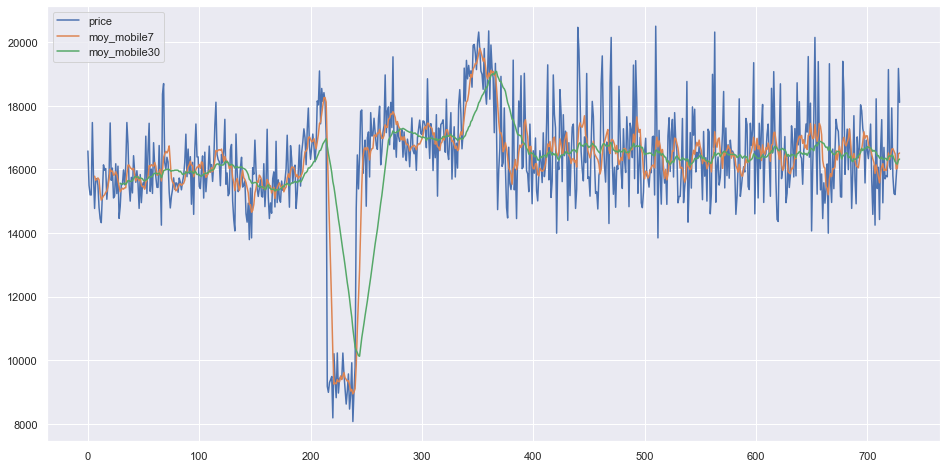

In [41]:
dfca_date[['price', 'moy_mobile7', 'moy_mobile30']].plot(figsize=(16, 8))

Je regroupe ensuite les références entre elles pour obersever les 10 meilleurs ventes dans un premier temps et les 10 dernières sous forme de diagrammes.

In [42]:
CA_produit = fichier_final[['id_prod', 'price']].groupby('id_prod').sum().reset_index()
CA_produit_plus = CA_produit.sort_values('price', ascending=False).head(10)
CA_produit_plus

,id_prod,price
3097,2_159,94893.50
3071,2_135,69334.95
3046,2_112,65407.76
3035,2_102,60736.78
3153,2_209,56971.86
2620,1_395,54356.25
2592,1_369,54025.48
3044,2_110,53846.25
3202,2_39,53060.85
3105,2_166,52449.12


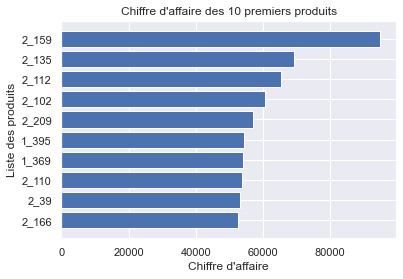

In [43]:
plt.barh(width = CA_produit_plus['price'], y = CA_produit_plus['id_prod'])
plt.title("Chiffre d'affaire des 10 premiers produits")
plt.xlabel("Chiffre d'affaire")
plt.ylabel("Liste des produits")
#j'inverse l'axe y pour avoir les valeurs plus élevées en premier.
plt.gca().invert_yaxis()
plt.show()

In [44]:
CA_produit_moins = CA_produit.sort_values('price', ascending=True).head(10)
CA_produit_moins

,id_prod,price
595,0_1539,0.99
313,0_1284,1.38
719,0_1653,1.98
1785,0_541,1.99
2080,0_807,1.99
665,0_1601,1.99
802,0_1728,2.27
549,0_1498,2.48
2180,0_898,2.54
925,0_1840,2.56


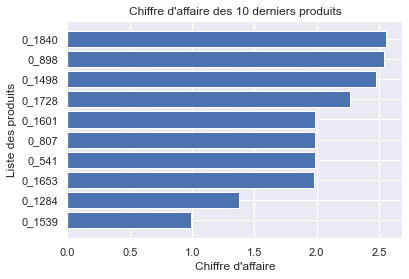

In [45]:
plt.barh(width = CA_produit_moins['price'], y = CA_produit_moins['id_prod'])
plt.title("Chiffre d'affaire des 10 derniers produits")
plt.xlabel("Chiffre d'affaire")
plt.ylabel("Liste des produits")
plt.show()

Je regarde maintenant la répartition du chiffre d'affaire entre les références. Ici nous remarquons que 80% environ des produits ne rapportent que 20% du chiffre d'affaire et inversement. Cette répartition inégalitaire est confirmée par un coefficient de Gini éloigné de 0 (0,74).

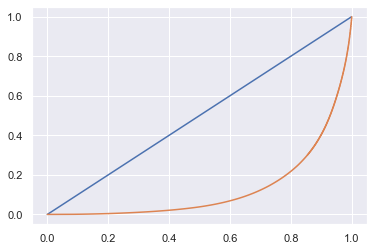

In [46]:
ca_reference = CA_produit['price'].values
n = len(ca_reference)
lorenz = np.cumsum(np.sort(ca_reference)) / ca_reference.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot([0, 1]) #Tracer de la première bissectrice
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

In [47]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.7428266007857867

Je m'intéresse maintenant à la répartion du chiffre d'affaire par catégorie. Les catégories 0 et 1 sont celles qui semblent le plus contribué au CA total.

In [48]:
CA_produit_categ = fichier_final[['price', 'categ']].groupby('categ').sum().reset_index()
CA_produit_categ

,categ,price
0,0.0,4422323.30
1,1.0,4653722.69
2,2.0,2780275.02


In [49]:
CA_produit_categ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   categ   3 non-null      float64
 1   price   3 non-null      float64
dtypes: float64(2)
memory usage: 176.0 bytes


In [50]:
CA_produit_categ['categ'] = CA_produit_categ['categ'].astype('category')
CA_produit_categ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   categ   3 non-null      category
 1   price   3 non-null      float64 
dtypes: category(1), float64(1)
memory usage: 287.0 bytes


<function matplotlib.pyplot.show(close=None, block=None)>

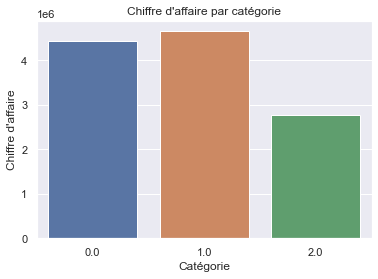

In [51]:
sns.barplot(
    y="price", 
    x="categ", 
    data=CA_produit_categ)
plt.xlabel("Catégorie")
plt.ylabel("Chiffre d'affaire")
plt.title("Chiffre d'affaire par catégorie")
plt.show

Je regarde cette fois la répartition du chiffre d'affaire entre les clients. Ici nous remarquons que 60% environ des clients ne rapportent qu'un peu moins de 30% du chiffre d'affaire et inversement. Cette répartition peu égalitaire est confirmée par un coefficient de Gini éloigné de 0 (0,45).

In [52]:
CA_client = fichier_final[['client_id', 'price']].groupby('client_id').sum().reset_index()
CA_client

,client_id,price
0,c_1,558.18
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2261.89
4,c_1001,1812.86
...,...,...
8595,c_995,189.41
8596,c_996,1625.58
8597,c_997,1490.01
8598,c_998,2779.88


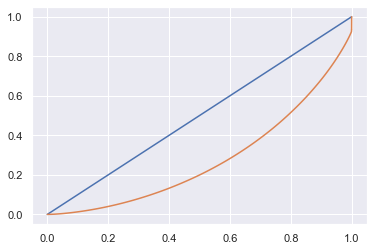

In [53]:
dep = CA_client['price'].values
n = len(dep)
lorenz2 = np.cumsum(np.sort(dep)) / dep.sum()
lorenz2 = np.append([0],lorenz2) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot([0, 1]) #Tracer de la première bissectrice
plt.plot(xaxis,lorenz2,drawstyle='steps-post')
plt.show()

In [54]:
AUC = (lorenz2.sum() -lorenz2[-1]/2 -lorenz2[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini2 = 2*S
gini2

0.44639658571467455

## Partie 3 - Analyse plus ciblée sur les clients

Pour cette partie sur l'analyse des clients, je vais rajouter des variables au dataframe :
* le nombre de ventes total par client sur deux années entières
* le nombre de produits achetés par client chaque mois (la fréquence d'achats)
* la taille du panier moyen pour chaque client
* le chiffre d'affaires total par client sur les deux années

In [55]:
fichier_final['date_fixe'] = fichier_final['date'].dt.date # Variable temporaire de date fixe (jour)
fichier_final.head()

,id_prod,date,session_id,client_id,sex,birth,price,categ,date_fixe
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0,2022-05-20
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0,2021-07-20
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0,2022-08-20
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0,2021-05-09
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0,2022-05-30


In [56]:
df_client = fichier_final.merge(
    fichier_final.groupby('client_id').count()['date'].reset_index().rename(columns={'date': 'total_ventes'}),
    how='left', on='client_id')
df_client.sample(3)

,id_prod,date,session_id,client_id,sex,birth,price,categ,date_fixe,total_ventes
537236,1_579,2021-12-06 23:13:42.916255,s_130498,c_91,m,1971.0,23.99,1.0,2021-12-06,83
67099,0_1358,2022-03-11 04:25:07.706273,s_177463,c_6358,m,1976.0,16.49,0.0,2022-03-11,243
372495,0_1461,2021-03-22 17:53:56.137052,s_10004,c_3469,m,1953.0,11.99,0.0,2021-03-22,18


In [57]:
df_client['ventes_mensuelles'] = round(df_client['total_ventes'] / 24)
df_client.sample(3)

,id_prod,date,session_id,client_id,sex,birth,price,categ,date_fixe,total_ventes,ventes_mensuelles
137238,0_1113,2022-05-31 03:06:11.318434,s_216640,c_1486,m,1974.0,16.99,0.0,2022-05-31,148,6.0
120366,0_1548,2022-11-09 19:44:59.393906,s_295217,c_5993,f,1984.0,9.66,0.0,2022-11-09,306,13.0
380165,1_433,2021-11-16 04:33:18.702959,s_120325,c_5589,f,2002.0,18.99,1.0,2021-11-16,45,2.0


In [58]:
df_client = df_client.merge(
    df_client.pivot_table(
        index=['client_id', 'date_fixe'], 
        values='price', 
        aggfunc='count').reset_index().pivot_table(
        index='client_id').reset_index().rename(
        columns={'price': 'taille_panier_moyen'}), 
    on='client_id', how='left').drop('date_fixe', axis=1)
df_client.sample(3)

,id_prod,date,session_id,client_id,sex,birth,price,categ,total_ventes,ventes_mensuelles,taille_panier_moyen
62158,0_1441,2022-03-15 18:43:24.928318,s_179609,c_5953,m,1986.0,18.99,0.0,374,16.0,3.142857
219313,0_1584,2021-05-16 17:41:21.227924,s_35377,c_2586,f,1953.0,11.85,0.0,150,6.0,1.470588
446060,0_1042,2021-03-30 20:06:56.060008,s_13667,c_1609,m,1980.0,18.53,0.0,25488,1062.0,34.915068


In [59]:
df_client = df_client.merge(
    df_client.pivot_table(
    index='client_id', values='price', 
    aggfunc='sum').reset_index().rename(
    columns={'price': 'total_achats'}),
    on='client_id', how='left')
df_client.sample(3)

,id_prod,date,session_id,client_id,sex,birth,price,categ,total_ventes,ventes_mensuelles,taille_panier_moyen,total_achats
138575,0_1473,2022-07-19 13:11:11.369443,s_240624,c_6566,f,1982.0,15.99,0.0,76,3.0,3.454545,1423.19
295367,0_1472,2021-09-27 11:33:41.327919,s_96316,c_2300,m,1983.0,12.49,0.0,81,3.0,2.892857,977.70
90836,0_1431,2022-03-10 02:03:47.759995,s_176945,c_4826,f,1972.0,10.99,0.0,226,9.0,2.973684,2829.98


In [60]:
df_client['birth'] = df_client['birth'].astype('int')
df_client['birth'].info()

<class 'pandas.core.series.Series'>
Int64Index: 679332 entries, 0 to 679331
Series name: birth
Non-Null Count   Dtype
--------------   -----
679332 non-null  int64
dtypes: int64(1)
memory usage: 10.4 MB


In [61]:
from datetime import datetime

annee = datetime.now().year # Année courante
df_client['age'] = annee - df_client['birth'] # Âge du client
df_client.sample(3)


,id_prod,date,session_id,client_id,sex,birth,price,categ,total_ventes,ventes_mensuelles,taille_panier_moyen,total_achats,age
446903,0_1458,2022-05-29 21:51:42.416654,s_216035,c_7460,f,1974,6.55,0.0,147,6.0,3.195652,2126.25,48
179887,1_488,2021-06-22 13:21:28.452475,s_52222,c_6236,f,1976,12.19,1.0,103,4.0,2.395349,1459.58,46
607450,0_1861,2022-01-15 11:05:01.302273,s_150155,c_4844,m,1978,10.99,0.0,167,7.0,2.569231,2151.12,44


<function matplotlib.pyplot.show(close=None, block=None)>

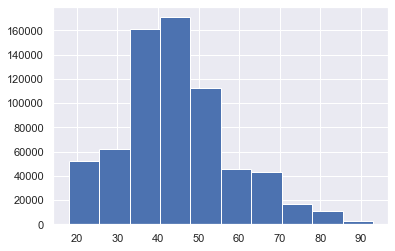

In [105]:
plt.hist(df_client['age'])
plt.show

Je divise la population en trois groupe d'age :  jeunes(35 et -), adultes(36-55), aînés(56 et +).

In [63]:
# Tranches d'âge
df_client['classe_age'] = 'Jeune'
df_client['classe_age'].loc[df_client[df_client['age']>=36].index] = 'Adulte'
df_client['classe_age'].loc[df_client[df_client['age']>=56].index] = 'Aîné'
df_client.sample(3)

/var/folders/td/c26psjjd02d96xkgx9bsmm8m0000gn/T/ipykernel_4904/2247933977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_client['classe_age'].loc[df_client[df_client['age']>=36].index] = 'Adulte'
/var/folders/td/c26psjjd02d96xkgx9bsmm8m0000gn/T/ipykernel_4904/2247933977.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_client['classe_age'].loc[df_client[df_client['age']>=56].index] = 'Aîné'


,id_prod,date,session_id,client_id,sex,birth,price,categ,total_ventes,ventes_mensuelles,taille_panier_moyen,total_achats,age,classe_age
622443,1_651,2023-02-22 06:46:53.468413,s_345188,c_6284,f,1956,18.99,1.0,81,3.0,1.350000,1337.58,66,Aîné
484570,0_855,2022-03-28 02:56:08.836281,s_185585,c_3766,m,1989,7.99,0.0,231,10.0,2.750000,3132.28,33,Jeune
245893,1_459,2021-07-16 21:57:00.438752,s_63231,c_3454,m,1969,15.99,1.0,6773,282.0,9.278082,113673.12,53,Adulte


En regardant le chiffre d'affaire par client on remarque que 4 clients sortent du lot. Ce sont probablement des professionnels.

In [78]:
ca_annuel = df_client.pivot_table(
    index='client_id', values=[
        'total_achats','ventes_mensuelles','taille_panier_moyen','total_ventes', 'age']
    ).sort_values(by='total_achats', ascending=False).reset_index()

ca_annuel.head(10) # Les 10 clients aux plus gros chiffres d'affaires annuels

,client_id,age,taille_panier_moyen,total_achats,total_ventes,ventes_mensuelles
0,c_1609,42,34.915068,324033.35,25488,1062.0
1,c_4958,23,7.165517,289760.34,5195,216.0
2,c_6714,54,13.031206,153669.30,9187,383.0
3,c_3454,53,9.278082,113673.12,6773,282.0
4,c_3263,37,2.985185,5276.87,403,17.0
5,c_1570,43,2.654676,5271.62,369,15.0
6,c_2899,28,1.640625,5214.05,105,4.0
7,c_2140,45,3.190476,5208.82,402,17.0
8,c_7319,48,2.708029,5155.77,371,15.0
9,c_8026,44,2.772059,5094.31,377,16.0


Pour ne pas que le poids de ces clients professionnels n'affectent les analyses prochaines je vais séparer en deux groupes, B2C et B2B.

In [65]:
# Création d'une variable 'Type' de client (2 modalités : particulier ou professionnel)
df_client['client_type'] = 'B2C'
df_client['client_type'].loc[df_client[df_client['client_id'].isin(ca_annuel.head(4)['client_id'])].index] = 'B2B'

# Création de 2 dataframe
b2b = df_client[df_client['client_type']=='B2B']
b2c = df_client[df_client['client_type']=='B2C']

df_client.sample(3)

/var/folders/td/c26psjjd02d96xkgx9bsmm8m0000gn/T/ipykernel_4904/527336293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_client['client_type'].loc[df_client[df_client['client_id'].isin(ca_annuel.head(4)['client_id'])].index] = 'B2B'


,id_prod,date,session_id,client_id,sex,birth,price,categ,total_ventes,ventes_mensuelles,taille_panier_moyen,total_achats,age,classe_age,client_type
608959,0_579,2022-11-06 02:13:48.340494,s_293336,c_3807,f,1968,6.99,0.0,16,1.0,1.230769,185.14,54,Adulte,B2C
74927,0_1440,2022-08-19 22:06:56.044361,s_255678,c_6385,m,1981,5.62,0.0,118,5.0,2.145455,1341.91,41,Adulte,B2C
484536,0_1069,2022-04-04 10:26:05.657314,s_189091,c_932,m,1973,7.99,0.0,93,4.0,2.268293,1146.58,49,Adulte,B2C


### 1. Existe t-il un lien entre le genre d’un client et les catégories des livres achetés ?   

Pour répondre à cela je vais utiliser une table de contingence car il s'agit de comparer deux variables qualitatives. 

Mon seuil alpha, de .05, sera toujours le même pour tous les tests statistiques à suivre.

In [66]:
genre_cat = b2c.pivot_table(index='categ', columns='sex', values='price', aggfunc=len, margins=True, margins_name='Total')
genre_cat.head()

sex,f,m,Total
categ,,,
0.0,200904,186589,387493
1.0,111331,101017,212348
2.0,16980,15868,32848
Total,329215,303474,632689


<AxesSubplot:xlabel='sex', ylabel='categ'>

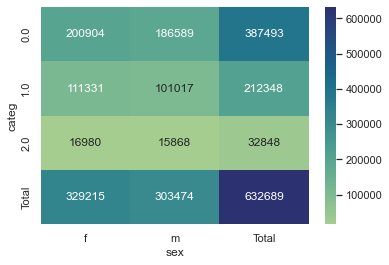

In [67]:
sns.heatmap(genre_cat, annot=True, fmt='g', cmap="crest")

Le test de normalité ne fait pas partie des conditions du Chi2, vu qu'on ne mesure la normalité que sur des variables quantitatives.  

On doit malgré tout valider 2 conditions :  

* au moins 1 valeur dans chaque cellule de la table de contingence  
* au moins 80% des valeurs égales ou supérieures à 5  


Les deux conditions sont remplies, je peux donc utiliser un test paramétrique comme le Chi2.

Je pose mes deux hypothèses:  
H0 = les deux variables sont indépendantes  
H1 = les deux variables sont correlées  

In [68]:
import scipy.stats as st
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(genre_cat)
print('Le Chi2 est égale à', round(st_chi2, 2))
print('La valeur de p calculé est de', st_p)

Le Chi2 est égale à 20.2
La valeur de p calculé est de 0.002551063708568263


La p_value obtenue est bien inférieure au risque alpha, je peux donc rejeter l'hypothese nulle. Il reste cependant à calculer la force de la relation entre nos deux variables. Ce qui peu être fait avec le V de Cramer (compris en -1 et 1, plus il est pret de 0 et moins la correlation entre les variables est forte).

In [69]:
X2 = st.chi2_contingency(genre_cat, correction=False)[0]
N = np.sum(genre_cat).sum()
minimum_dimension = min(genre_cat.shape)-1
  
# Calcul V de Cramer

result = np.sqrt((X2/N) / minimum_dimension)
print(result)

0.0019977328800928544


Comme le résultat est très proche de 0 on peut dire que l'intensité de la corrélation entre nos deux variables semble plutôt faible.

### 2. Existe t-il un lien entre l’âge des clients et le montant total des achats ?  

Pour répondre à cette question j'ai décidé de diviser mon groupe en trois classes d'age. Il s'agira donc de comparer une variable qualitative avec une variable quantitative. Dans un premier temps je vais réaliser un box plot par sous-échantillon.

In [70]:
age_total_achat = b2c[['classe_age', 'total_achats']].groupby('classe_age').mean().reset_index()
age_total_achat.head()

,classe_age,total_achats
0,Adulte,2192.860815
1,Aîné,1386.562955
2,Jeune,2091.829352


/Users/cedricmary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


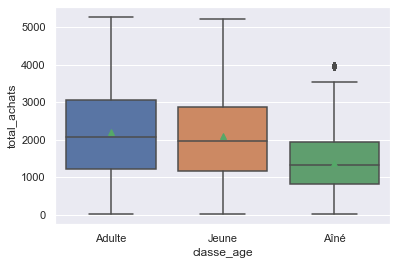

In [71]:
sns.boxplot('classe_age','total_achats',data=b2c, showmeans=True)
plt.show()

Je vais effectuer un test de normalité (Test de Kolmogorov-Smirnov) pour savoir si je peux utliser un test paramétrique ou non par la suite.   
    
La p_value obtenue est inférieure à notre seuil de .05 je rejette donc l'hypothèse nulle de normalité. Je vais devoir utiliser une test non paramétrique, ici je choisis le Test de Kruskal-Wallis.

In [72]:
from scipy.stats import kstest
kstest(b2c['total_achats'], 'norm')

KstestResult(statistic=0.9999999998604823, pvalue=0.0)

Je pose mes deux hypothèses:  
H0 = Les trois moyennes sont égales  
H1 = Au moins une des trois moyennes diffèrent des autres

In [73]:
from scipy import stats

data_group1 = b2c[b2c['classe_age']=='Jeune']['total_achats']
data_group2 = b2c[b2c['classe_age']=='Adulte']['total_achats']
data_group3 = b2c[b2c['classe_age']=='Aîné']['total_achats']

result = stats.kruskal(data_group1, data_group2, data_group3)

print(result)

KruskalResult(statistic=45694.647207633374, pvalue=0.0)


La p_value obtenue est bien inférieure au risque alpha, je peux donc rejeter l'hypothese nulle. Ainsi on peut dire que la classe d'âge a un effet sur le montant total des achats.

### 3. Existe t-il un lien entre l’âge des clients et la fréquence des achats ?

Pour répondre à cette question j'ai décidé de diviser mon groupe en trois classes d'age. Il s'agira donc de comparer une variable qualitative avec une variable quantitative. Dans un premier temps je vais réaliser un box plot par sous-échantillon.

In [397]:
age_frequence = b2c[['classe_age', 'ventes_mensuelles']].groupby('classe_age').mean().reset_index()
age_frequence.head()

,classe_age,ventes_mensuelles
0,Adulte,6.825034
1,Aîné,3.426862
2,Jeune,4.961837


/Users/cedricmary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


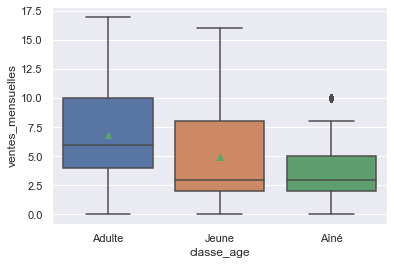

In [398]:
sns.boxplot('classe_age','ventes_mensuelles',data=b2c, showmeans=True)
plt.show()

Je vais effectuer un test de normalité (Test de Kolmogorov-Smirnov) pour savoir si je peux utliser un test paramétrique ou non par la suite.   
    
La p_value obtenue est inférieure à notre seuil de .05 je rejette donc l'hypothèse nulle de normalité. Je vais devoir utiliser une test non paramétrique, ici je choisis le Test de Kruskal-Wallis.

In [399]:
from scipy.stats import kstest
kstest(b2c['ventes_mensuelles'], 'norm')

KstestResult(statistic=0.8826599510467835, pvalue=0.0)

Je pose mes deux hypothèses:  
H0 = Les trois moyennes sont égales  
H1 = Au moins une des trois moyennes diffèrent des autres

In [400]:
from scipy import stats

group1 = b2c[b2c['classe_age']=='Jeune']['ventes_mensuelles']
group2 = b2c[b2c['classe_age']=='Adulte']['ventes_mensuelles']
group3 = b2c[b2c['classe_age']=='Aîné']['ventes_mensuelles']

resultat = stats.kruskal(group1, group2, group3)

print(resultat)

KruskalResult(statistic=86066.67517174533, pvalue=0.0)


La p_value obtenue est bien inférieure au risque alpha, je peux donc rejeter l'hypothese nulle. Ainsi on peut dire que la classe d'âge a également un effet sur la fréquence des achats.

### 4. Existe t-il un lien entre l’âge des clients et la taille du panier moyen ?

De nouveau mon groupe de client est divisé en trois classes d'age. Il s'agira donc de comparer une variable qualitative avec une variable quantitative. Dans un premier temps je vais réaliser un box plot par sous-échantillon.

In [401]:
age_panier_moyen = b2c[['classe_age', 'taille_panier_moyen']].groupby('classe_age').mean().reset_index()
age_panier_moyen.head()

,classe_age,taille_panier_moyen
0,Adulte,2.431537
1,Aîné,1.595841
2,Jeune,2.297683


/Users/cedricmary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


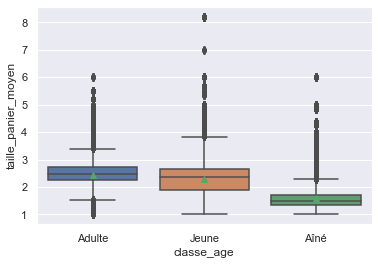

In [402]:
sns.boxplot('classe_age','taille_panier_moyen',data=b2c, showmeans=True)
plt.show()

Je vais effectuer un test de normalité (Test de Kolmogorov-Smirnov) pour savoir si je peux utliser un test paramétrique ou non par la suite.   
    
La p_value obtenue est inférieure à notre seuil de .05 je rejette donc l'hypothèse nulle de normalité. Je vais devoir utiliser une test non paramétrique, ici je choisis le Test de Kruskal-Wallis.

In [403]:
from scipy.stats import kstest
kstest(b2c['taille_panier_moyen'], 'norm')

KstestResult(statistic=0.8613286223616016, pvalue=0.0)

Je pose de nouveau mes deux hypothèses:  
H0 = Les trois moyennes sont égales  
H1 = Au moins une des trois moyennes diffèrent des autres

In [404]:
from scipy import stats

donnee_group1 = b2c[b2c['classe_age']=='Jeune']['taille_panier_moyen']
donnee_group2 = b2c[b2c['classe_age']=='Adulte']['taille_panier_moyen']
donnee_group3 = b2c[b2c['classe_age']=='Aîné']['taille_panier_moyen']

results = stats.kruskal(donnee_group1, donnee_group2, donnee_group3)

print(results)

KruskalResult(statistic=167827.15256041824, pvalue=0.0)


La p_value obtenue est encore bien inférieure au risque alpha, je peux donc rejeter l'hypothese nulle. On peut alors dire que la classe d'âge a aussi un effet significatif sur la taille du panier moyen.

### 5. Existe t-il un lien entre l’âge des clients et la catégorie des achats ?

Pour répondre à cela je vais utiliser une table de contingence car il s'agit de comparer deux variables qualitatives.

In [405]:
age_categ = b2c.pivot_table(index='classe_age', columns='categ', values='price', aggfunc=len, margins=True, margins_name='Total')
age_categ.head()

categ,0.0,1.0,2.0,Total
classe_age,,,,
Adulte,245285,95191,1504,341980
Aîné,52241,67029,1092,120362
Jeune,89967,50128,30252,170347
Total,387493,212348,32848,632689


<AxesSubplot:xlabel='categ', ylabel='classe_age'>

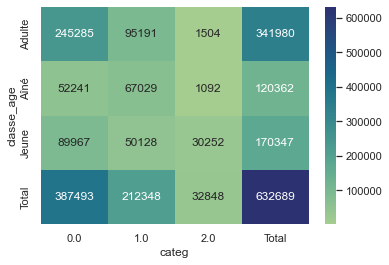

In [406]:
sns.heatmap(age_categ, annot=True, fmt='g', cmap="crest")

Le test de normalité ne fait pas partie des conditions du Chi2, vu qu'on ne mesure la normalité que sur des variables quantitatives.  

On doit malgré tout valider 2 conditions :  

* au moins 1 valeur dans chaque cellule de la table de contingence  
* au moins 80% des valeurs égales ou supérieures à 5  


Les deux conditions sont remplies, je peux donc utiliser un test paramétrique comme le Chi2.

Je pose mes deux hypothèses:  
H0 = les deux variables sont indépendantes  
H1 = les deux variables sont correlées  

In [407]:
import scipy.stats as st
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(age_categ)
print('Le Chi2 est égale à', round(st_chi2, 2))
print('La valeur de p calculé est de', st_p)

Le Chi2 est égale à 107083.83
La valeur de p calculé est de 0.0


La p_value obtenue est bien inférieure au risque alpha, je peux donc rejeter l'hypothese nulle. Il reste cependant à calculer la force de la relation entre nos deux variables. Ce qui peu être fait avec le V de Cramer.

In [408]:
X2 = st.chi2_contingency(age_categ, correction=False)[0]
N = np.sum(age_categ).sum()
minimum_dimension = min(age_categ.shape)-1
  
# Calcul V de Cramer

result = np.sqrt((X2/N) / minimum_dimension)
print(result)

0.11876163920223896


Comme le résultat est proche de 0 je considère que l'intensité de la corrélation entre l'âge et la catégorie des produits semble faible.

## 